In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns

## Read in data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Ananya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2018_Top_Songs.csv')
Ananya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2019_Top_Songs.csv')
Ananya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2020_Top_Songs.csv')
Ananya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2021_Top_Songs.csv')
Ananya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2022_Top_Songs.csv')
Ananya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2023_Top_Songs.csv')

Arushi_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2018_Top_Songs.csv')
Arushi_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2019_Top_Songs.csv')
Arushi_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2020_Top_Songs.csv')
Arushi_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2021_Top_Songs.csv')
Arushi_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2022_Top_Songs.csv')
Arushi_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2023_Top_Songs.csv')

Ritika_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2018_Top_Songs.csv')
Ritika_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2019_Top_Songs.csv')
Ritika_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2020_Top_Songs.csv')
Ritika_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2021_Top_Songs.csv')
Ritika_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2022_Top_Songs.csv')
Ritika_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2023_Top_Songs.csv')

Shriya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2018_Top_Songs.csv')
Shriya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2019_Top_Songs.csv')
Shriya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2020_Top_Songs.csv')
Shriya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2021_Top_Songs.csv')
Shriya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2022_Top_Songs.csv')
Shriya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2023_Top_Songs.csv')

In [ ]:
ananya_df_concat = pd.concat([Ananya_df_2018, Ananya_df_2019, Ananya_df_2020, Ananya_df_2021, Ananya_df_2022, Ananya_df_2023], ignore_index=True, axis=0)
arushi_df_concat = pd.concat([Arushi_df_2018, Arushi_df_2019, Arushi_df_2020, Arushi_df_2021, Arushi_df_2022, Arushi_df_2023], ignore_index=True, axis=0)
ritika_df_concat = pd.concat([Ritika_df_2018, Ritika_df_2019, Ritika_df_2020, Ritika_df_2021, Ritika_df_2022, Ritika_df_2023], ignore_index=True, axis=0)
shriya_df_concat = pd.concat([Shriya_df_2018, Shriya_df_2019, Shriya_df_2020, Shriya_df_2021, Shriya_df_2022, Shriya_df_2023], ignore_index=True, axis=0)
all_df_concat = pd.concat([ananya_df_concat, arushi_df_concat, ritika_df_concat, shriya_df_concat], ignore_index=True, axis=0)

## Prepare data for machine learning models

### Convert numeric variables to scale of [0,1]

In [ ]:
# Funtion also used in "01_Data_Visualization.ipynb"
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [ ]:
numeric_cols = ['length',
                'popularity',
                'acousticness',
                'danceability',
                'energy',
                'instrumentalness',
                'liveness',
                'loudness',
                'speechiness',
                'valence',
                'tempo',
                'release_year']

for col in numeric_cols:
    convert_scale(all_df_concat, col)

In [ ]:
df_all_adj = all_df_concat.copy()
# df_all_adj

### Onehot encode categorical variables

In [ ]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_all_adj[['time_signature', 'mode', 'key']])
onehot = pd.DataFrame(oe_results.toarray(), columns=['time_signature_1', 'time_signature_2',
                                                     'time_signature_3', 'time_signature_4',
                                                     'mode_1', 'mode_2',
                                                     'key_1', 'key_2','key_3','key_4','key_5', 'key_6',
                                                     'key_7', 'key_8','key_9','key_10','key_11', 'key_12'])
df_all_adj = pd.concat([df_all_adj, onehot], axis=1)
# df_all_adj.T

In [ ]:
model_feature_cols = ['energy',
    'valence',
    'danceability',
    'liveness',
    'speechiness',
    'instrumentalness',
    'acousticness',
    'loudness',
    'length',
    'popularity',
    'tempo',
    'release_year',
    'time_signature_1',
    'time_signature_2',
    'time_signature_3',
    'time_signature_4',
    'mode_1',
    'mode_2',
    'key_1',
    'key_2',
    'key_3',
    'key_4',
    'key_5',
    'key_6',
    'key_7',
    'key_8',
    'key_9',
    'key_10',
    'key_11',
    'key_12']

model_y_cols = ['name',
                'album',
                'artist']

In [ ]:
df_all_adj = df_all_adj[model_feature_cols + model_y_cols]

df_all_adj.loc[:, 'true_label'] = ['0'] * 600 + ['1'] * 600 + ['2'] * 600 + ['3'] * 600

ananya_df_concat = df_all_adj.iloc[:600]
arushi_df_concat = df_all_adj.iloc[600:1200].reset_index()
ritika_df_concat = df_all_adj.iloc[1200:1800].reset_index()
shriya_df_concat = df_all_adj.iloc[1800:].reset_index()

<ipython-input-11-7b3a90bdbec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_adj.loc[:, 'true_label'] = ['0'] * 600 + ['1'] * 600 + ['2'] * 600 + ['3'] * 600


### Remove repeated songs

In [ ]:
# remove repeats on individual playlists
def remove_repeats(df):
  rows_old = range(len(df))
  rows_new = []
  skips = []
  for i in range(len(df)):
    for j in range(i+1, len(df)):
      if(df['name'][i] == df['name'][j]) and (df['artist'][i] == df['artist'][j]):
        skips.append(j)
  for row in rows_old:
    if not row in skips:
      rows_new.append(row)
  df = df.iloc[rows_new,:].reset_index(drop=True)
  return df

In [ ]:
df_ananya_no_repeats = remove_repeats(ananya_df_concat)
df_arushi_no_repeats = remove_repeats(arushi_df_concat)
df_ritika_no_repeats = remove_repeats(ritika_df_concat)
df_shriya_no_repeats = remove_repeats(shriya_df_concat)

print(len(df_ananya_no_repeats),len(df_arushi_no_repeats),len(df_ritika_no_repeats), len(df_shriya_no_repeats))

474 524 554 570


### Remove songs if they have all categories

In [ ]:
def remove_same_songs(df1, df2, df3, df4):
    rows_old_df1 = range(len(df1))
    rows_new_df1 = []

    rows_old_df2 = range(len(df2))
    rows_new_df2 = []

    rows_old_df3 = range(len(df3))
    rows_new_df3 = []

    rows_old_df4 = range(len(df4))
    rows_new_df4 = []

    same_songs_df1 = []
    same_songs_df2 = []
    same_songs_df3 = []
    same_songs_df4 = []

    # Check for duplicates between df1 and df2
    for i in range(len(df1)):
        for j in range(len(df2)):
            if (df1['name'][i] == df2['name'][j]) and (df1['artist'][i] == df2['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df2.append(j)

    # Check for duplicates between df1 and df3
    for i in range(len(df1)):
        for j in range(len(df3)):
            if (df1['name'][i] == df3['name'][j]) and (df1['artist'][i] == df3['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df3.append(j)
                # Check for duplicates between df1 and df4
    for i in range(len(df1)):
        for j in range(len(df4)):
            if (df1['name'][i] == df4['name'][j]) and (df1['artist'][i] == df4['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df2 and df3
    for i in range(len(df2)):
        for j in range(len(df3)):
            if (df2['name'][i] == df3['name'][j]) and (df2['artist'][i] == df3['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df2 and df4
    for i in range(len(df2)):
        for j in range(len(df4)):
            if (df2['name'][i] == df4['name'][j]) and (df2['artist'][i] == df4['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df3 and df4
    for i in range(len(df3)):
        for j in range(len(df4)):
            if (df3['name'][i] == df4['name'][j]) and (df3['artist'][i] == df4['artist'][j]):
                same_songs_df3.append(i)
                same_songs_df4.append(j)

    for row in rows_old_df1:
        if row not in same_songs_df1:
            rows_new_df1.append(row)

    for row in rows_old_df2:
        if row not in same_songs_df2:
            rows_new_df2.append(row)

    for row in rows_old_df3:
        if row not in same_songs_df3:
            rows_new_df3.append(row)

    for row in rows_old_df4:
        if row not in same_songs_df4:
            rows_new_df4.append(row)

    df1_result = df1.iloc[rows_new_df1, :].reset_index(drop=True)
    df2_result = df2.iloc[rows_new_df2, :].reset_index(drop=True)
    df3_result = df3.iloc[rows_new_df3, :].reset_index(drop=True)
    df4_result = df4.iloc[rows_new_df4, :].reset_index(drop=True)

    return df1_result, df2_result, df3_result, df4_result

df_ananya_no_repeats_no_same, df_arushi_no_repeats_no_same, df_ritika_no_repeats_no_same, df_shriya_no_repeats_no_same = remove_same_songs(
    df_ananya_no_repeats,
    df_arushi_no_repeats,
    df_ritika_no_repeats,
    df_shriya_no_repeats
)

print(len(df_ananya_no_repeats_no_same))
print(len(df_arushi_no_repeats_no_same))
print(len(df_ritika_no_repeats_no_same))
print(len(df_shriya_no_repeats_no_same))


286
367
381
425


### Upsample smaller category so number of samples per class size is equal

In [ ]:
# upsample adam for same size categories
def add_missing_songs(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = r.choice(df.shape[0], size=n, replace=False)
    new_df = pd.concat([df,  df.iloc[new_samples,:]], ignore_index=True, axis=0)
    return new_df

In [ ]:
df_ananya_no_repeats_no_same_up_sampled = add_missing_songs(df_ananya_no_repeats_no_same, 139, 42)
df_arushi_no_repeats_no_same_up_sampled = add_missing_songs(df_arushi_no_repeats_no_same, 58, 42)
df_ritika_no_repeats_no_same_up_sampled = add_missing_songs(df_ritika_no_repeats_no_same, 44, 42)
# df_adam_no_repeats_no_same_up_sampled

In [ ]:
def limit_features(df):
    return df[model_feature_cols]

In [ ]:
ananya_features = limit_features(df_ananya_no_repeats_no_same_up_sampled)
arushi_features = limit_features(df_arushi_no_repeats_no_same_up_sampled)
ritika_features = limit_features(df_ritika_no_repeats_no_same_up_sampled)
shriya_features = limit_features(df_shriya_no_repeats_no_same)

### Get training and test sets

In [ ]:
def get_train_test(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = list(r.choice(df.shape[0], size=n, replace=False))

    train_1 = new_samples[0:336] + new_samples[420:426] #342
    test_1 = new_samples[336:420]

    train_2 = new_samples[0:252] + new_samples[336:420] + new_samples[420:426] #342
    test_2 = new_samples[252:336]

    train_3 = new_samples[0:168] + new_samples[252:420] + new_samples[420:426]  #342
    test_3 = new_samples[168:252]

    train_4 = new_samples[0:84] + new_samples[168:420] + new_samples[420:426] #342
    test_4 = new_samples[84:168]

    train_5 = new_samples[168:420] + new_samples[420:426]  #258
    test_5 = new_samples[0:84]

    return train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5

In [ ]:
train_test = get_train_test(df_ananya_no_repeats_no_same_up_sampled,
                            df_ananya_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5 =\
train_test[0], train_test[1], train_test[2], train_test[3], train_test[4], train_test[5], train_test[6], train_test[7], train_test[8], train_test[9]

In [ ]:
ananya_train_1 = ananya_features.iloc[train_1,:]
ananya_train_2 = ananya_features.iloc[train_2,:]
ananya_train_3 = ananya_features.iloc[train_3,:]
ananya_train_4 = ananya_features.iloc[train_4,:]
ananya_train_5 = ananya_features.iloc[train_5,:]

arushi_train_1 = arushi_features.iloc[train_1,:]
arushi_train_2 = arushi_features.iloc[train_2,:]
arushi_train_3 = arushi_features.iloc[train_3,:]
arushi_train_4 = arushi_features.iloc[train_4,:]
arushi_train_5 = arushi_features.iloc[train_5,:]

ritika_train_1 = ritika_features.iloc[train_1,:]
ritika_train_2 = ritika_features.iloc[train_2,:]
ritika_train_3 = ritika_features.iloc[train_3,:]
ritika_train_4 = ritika_features.iloc[train_4,:]
ritika_train_5 = ritika_features.iloc[train_5,:]

shriya_train_1 = shriya_features.iloc[train_1,:]
shriya_train_2 = shriya_features.iloc[train_2,:]
shriya_train_3 = shriya_features.iloc[train_3,:]
shriya_train_4 = shriya_features.iloc[train_4,:]
shriya_train_5 = shriya_features.iloc[train_5,:]

In [ ]:
ananya_test_1 = ananya_features.iloc[test_1,:]
ananya_test_2 = ananya_features.iloc[test_2,:]
ananya_test_3 = ananya_features.iloc[test_3,:]
ananya_test_4 = ananya_features.iloc[test_4,:]
ananya_test_5 = ananya_features.iloc[test_5,:]

arushi_test_1 = arushi_features.iloc[test_1,:]
arushi_test_2 = arushi_features.iloc[test_2,:]
arushi_test_3 = arushi_features.iloc[test_3,:]
arushi_test_4 = arushi_features.iloc[test_4,:]
arushi_test_5 = arushi_features.iloc[test_5,:]

ritika_test_1 = ritika_features.iloc[test_1,:]
ritika_test_2 = ritika_features.iloc[test_2,:]
ritika_test_3 = ritika_features.iloc[test_3,:]
ritika_test_4 = ritika_features.iloc[test_4,:]
ritika_test_5 = ritika_features.iloc[test_5,:]

shriya_test_1 = shriya_features.iloc[test_1,:]
shriya_test_2 = shriya_features.iloc[test_2,:]
shriya_test_3 = shriya_features.iloc[test_3,:]
shriya_test_4 = shriya_features.iloc[test_4,:]
shriya_test_5 = shriya_features.iloc[test_5,:]

In [ ]:
def get_train_and_test(ananya_train, arushi_train, ritika_train, shriya_train, ananya_test, arushi_test, ritika_test, shriya_test):
    train_X = pd.concat([ananya_train, arushi_train, ritika_train, shriya_train])
    test_X = pd.concat([ananya_test, arushi_test, ritika_test, shriya_test])
    train_y = ([0]*len(ananya_train)) + ([1]*len(arushi_train)) + ([2]*len(ritika_train)) + ([3]*len(shriya_train))
    test_y = ([0]*len(ananya_test)) + ([1]*len(arushi_test)) + ([2]*len(ritika_test)) + ([3]*len(shriya_test))
    return train_X, test_X, train_y, test_y

In [ ]:
train_X_1, test_X_1, train_y_1, test_y_1 = get_train_and_test(ananya_train_1,
                                                              arushi_train_1,
                                                              ritika_train_1,
                                                              shriya_train_1,
                                                              ananya_test_1,
                                                              arushi_test_1,
                                                              ritika_test_1,
                                                              shriya_test_1)
train_X_2, test_X_2, train_y_2, test_y_2 = get_train_and_test(ananya_train_2,
                                                              arushi_train_2,
                                                              ritika_train_2,
                                                              shriya_train_2,
                                                              ananya_test_2,
                                                              arushi_test_2,
                                                              ritika_test_2,
                                                              shriya_test_2)
train_X_3, test_X_3, train_y_3, test_y_3 = get_train_and_test(ananya_train_3,
                                                              arushi_train_3,
                                                              ritika_train_3,
                                                              shriya_train_3,
                                                              ananya_test_3,
                                                              arushi_test_3,
                                                              ritika_test_3,
                                                              shriya_test_3)
train_X_4, test_X_4, train_y_4, test_y_4 = get_train_and_test(ananya_train_4,
                                                              arushi_train_4,
                                                              ritika_train_4,
                                                              shriya_train_4,
                                                              ananya_test_4,
                                                              arushi_test_4,
                                                              ritika_test_4,
                                                              shriya_test_4)
train_X_5, test_X_5, train_y_5, test_y_5 = get_train_and_test(ananya_train_5,
                                                              arushi_train_5,
                                                              ritika_train_5,
                                                              shriya_train_5,
                                                              ananya_test_5,
                                                              arushi_test_5,
                                                              ritika_test_5,
                                                              shriya_test_5)

### Evaluation functions

In [ ]:
def accuracy(conf_matrix):
    # Assuming conf_matrix is a 4x4 confusion matrix
    num_classes = len(conf_matrix)
    total_correct = sum(conf_matrix[i][i] for i in range(num_classes))
    total_predictions = sum(sum(conf_matrix[i]) for i in range(num_classes))
    return total_correct / total_predictions

In [ ]:
def precision(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fp)

In [ ]:
def recall(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fn)

In [ ]:
def specificity(conf_matrix, class_index):
    # Calculate true negatives (TN) for the specified class
    tn = sum(conf_matrix[i][j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix)) if i != class_index and j != class_index)
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tn / (tn + fp)

In [ ]:
def f1(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    precision_ = tp / (tp + fp)
    recall_ = tp / (tp + fn)
    return 2 * precision_ * recall_ / (precision_ + recall_)

In [ ]:
def plot_roc_multiclass(title, y_true, y_scores, n_classes, save=False):
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    if save:
        plt.savefig(save, bbox_inches='tight')

    plt.show()

In [ ]:
def plot_pr_curve(y_test, y_score, title='', save=False):
    # Assuming you have four classes, adjust the plotting accordingly
    precision, recall, thresholds = [], [], []
    for i in range(4):
        precision_i, recall_i, thresholds_i = precision_recall_curve(y_test[:, i], y_score[:, i])
        precision.append(precision_i)
        recall.append(recall_i)
        thresholds.append(thresholds_i)

    # create precision recall curve
    fig, ax = plt.subplots()

    # Assuming you have four classes, adjust the plotting accordingly
    ax.plot(recall[0], precision[0], color='purple', label='Class 0')
    ax.plot(recall[1], precision[1], color='blue', label='Class 1')
    ax.plot(recall[2], precision[2], color='green', label='Class 2')
    ax.plot(recall[3], precision[3], color='orange', label='Class 3')

    # add axis labels to plot
    ax.set_title(title)  # Add title
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    plt.legend()  # Add legend for each class

    # display plot
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

### Compare predictions to actual

In [ ]:
def compare_predictions_Ananya(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[:84]
    test_set.loc[:,'prediction_probability'] = preds_[:84]
    test_set['actual'] = actual[:84]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    # test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Arushi(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[84:168]
    test_set.loc[:,'prediction_probability'] = preds_[84:168]
    test_set['actual'] = actual[84:168]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    # test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Ritika(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[168:252]
    test_set.loc[:,'prediction_probability'] = preds_[168:252]
    test_set['actual'] = actual[168:252]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    # test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Shriya(preds, preds_, actual, test_set, df_X_no_repeats_no_same):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[252:]
    test_set.loc[:,'prediction_probability'] = preds_[252:]
    test_set['actual'] = actual[252:]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    # test_set = test_set.sort_values('prediction_probability', ascending=True).reset_index()
    return test_set

### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
# define search space
space = dict()

space['solver'] = ['newton-cg', 'lbfgs']
space['penalty'] = ['l2']

# Define search with additional parameter for multi-class
space['multi_class'] = ['multinomial']  # 'ovr' for binary, 'multinomial' for multi-class

# define search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
search = GridSearchCV(lr, space, scoring='accuracy', cv=cv)
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.3651233570351217
Best Hyperparameters: {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr = LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial')

In [ ]:
lr.fit(X=train_X_1, y=train_y_1)
preds = lr.predict(X=test_X_1)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_1)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_1)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[35, 19,  9, 21],
       [26, 30, 10, 18],
       [21, 16, 28, 19],
       [15, 17, 24, 28]])

<Axes: >

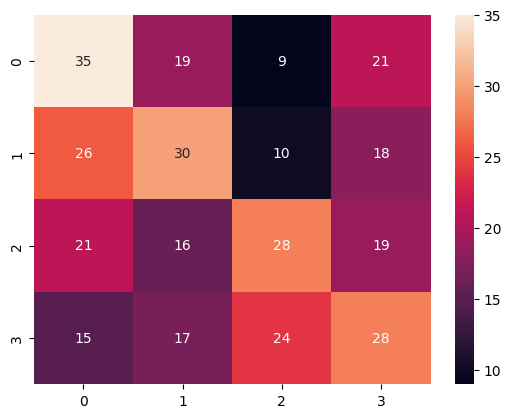

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.3601190476190476

In [ ]:
precision(conf_matrix,0)

0.36082474226804123

In [ ]:
recall(conf_matrix,1)

0.35714285714285715

In [ ]:
specificity(conf_matrix,2)

0.8293650793650794

In [ ]:
f1(conf_matrix,3)

0.3294117647058823

ROC-AUC Score (Class 0): 0.5853174603174603
ROC-AUC Score (Class 1): 0.5753968253968255
ROC-AUC Score (Class 2): 0.5813492063492063
ROC-AUC Score (Class 3): 0.5515873015873016
Macro-average ROC-AUC Score: 0.5734126984126984


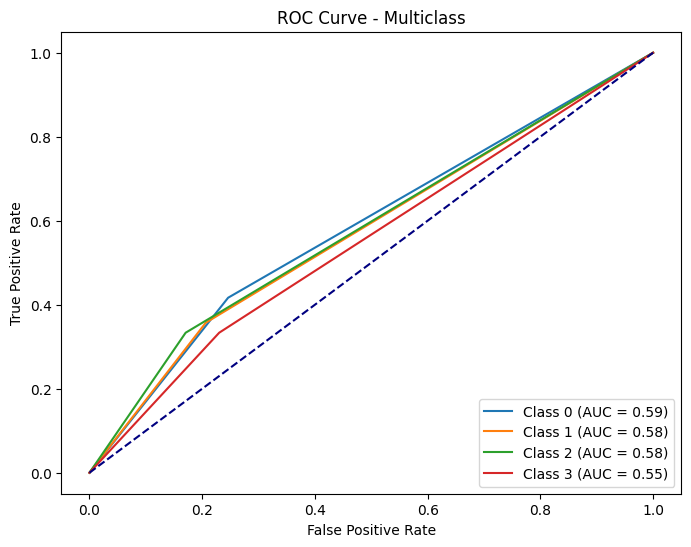

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.3906568435555019
Average Precision Score (Class 1): 0.38899996105976636
Average Precision Score (Class 2): 0.3676478502349879
Average Precision Score (Class 3): 0.30077428631826186
Macro-average Average Precision Score: 0.36201973529212955


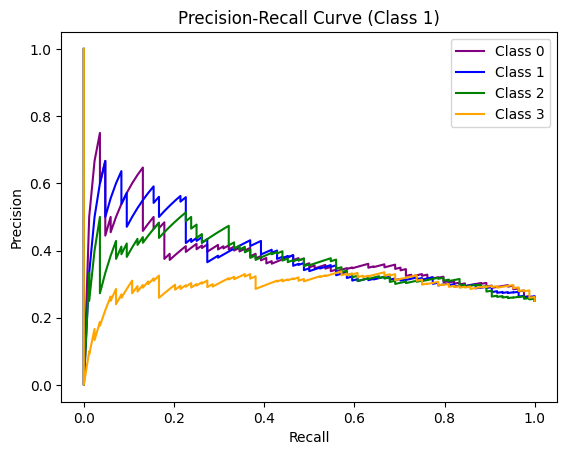

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
lr.fit(X=train_X_2, y=train_y_2)
preds = lr.predict(X=test_X_2)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_2)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_2)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[51, 13,  6, 14],
       [28, 26, 16, 14],
       [10, 20, 33, 21],
       [21, 12, 33, 18]])

<Axes: >

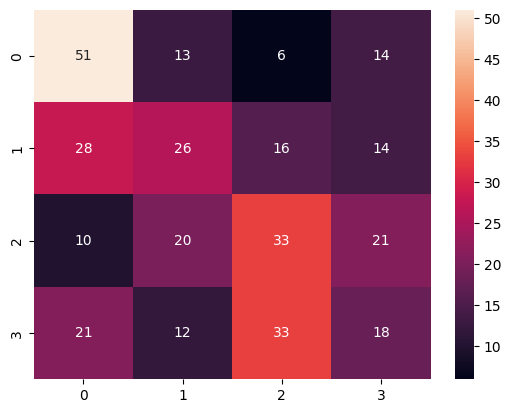

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.38095238095238093

In [ ]:
precision(conf_matrix,0)

0.4636363636363636

In [ ]:
recall(conf_matrix,1)

0.30952380952380953

In [ ]:
specificity(conf_matrix,2)

0.7817460317460317

In [ ]:
f1(conf_matrix,3)

0.23841059602649003

ROC-AUC Score (Class 0): 0.6865079365079365
ROC-AUC Score (Class 1): 0.5654761904761905
ROC-AUC Score (Class 2): 0.5873015873015873
ROC-AUC Score (Class 3): 0.5099206349206349
Macro-average ROC-AUC Score: 0.5873015873015873


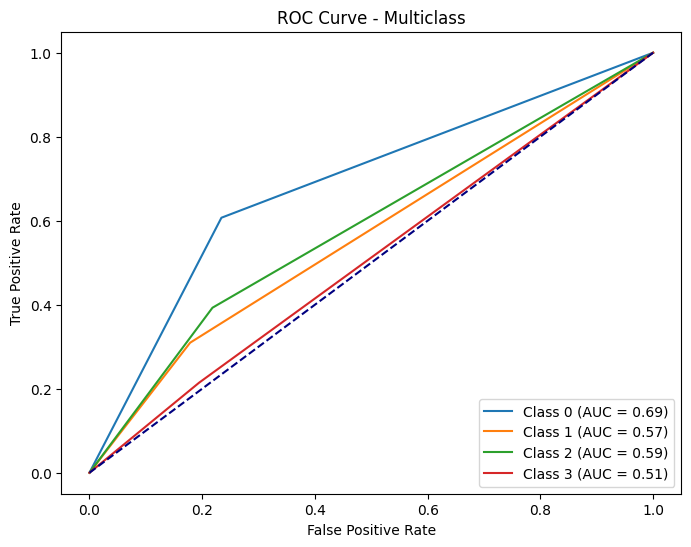

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.4949934074852134
Average Precision Score (Class 1): 0.3801640055362926
Average Precision Score (Class 2): 0.37808457047234034
Average Precision Score (Class 3): 0.3233332845081065
Macro-average Average Precision Score: 0.39414381700048823


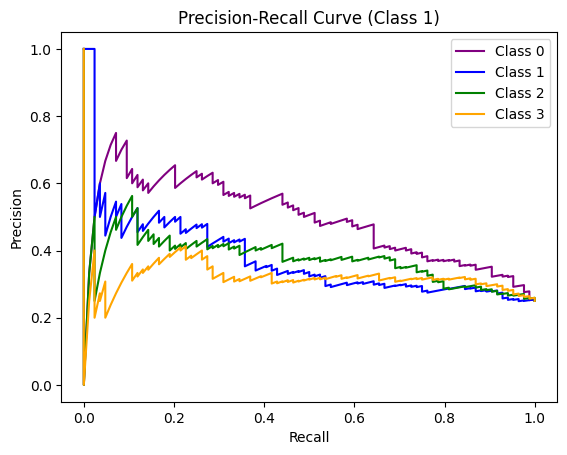

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
lr.fit(X=train_X_3, y=train_y_3)
preds = lr.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_3)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_3)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[40, 18, 12, 14],
       [23, 32, 15, 14],
       [17, 13, 31, 23],
       [14, 19, 26, 25]])

<Axes: >

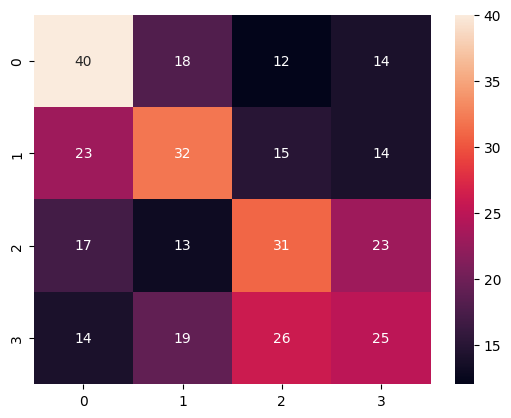

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.38095238095238093

In [ ]:
precision(conf_matrix,0)

0.425531914893617

In [ ]:
recall(conf_matrix,1)

0.38095238095238093

In [ ]:
specificity(conf_matrix,2)

0.7896825396825397

In [ ]:
f1(conf_matrix,3)

0.3125

ROC-AUC Score (Class 0): 0.6309523809523809
ROC-AUC Score (Class 1): 0.5912698412698413
ROC-AUC Score (Class 2): 0.5793650793650793
ROC-AUC Score (Class 3): 0.5476190476190477
Macro-average ROC-AUC Score: 0.5873015873015873


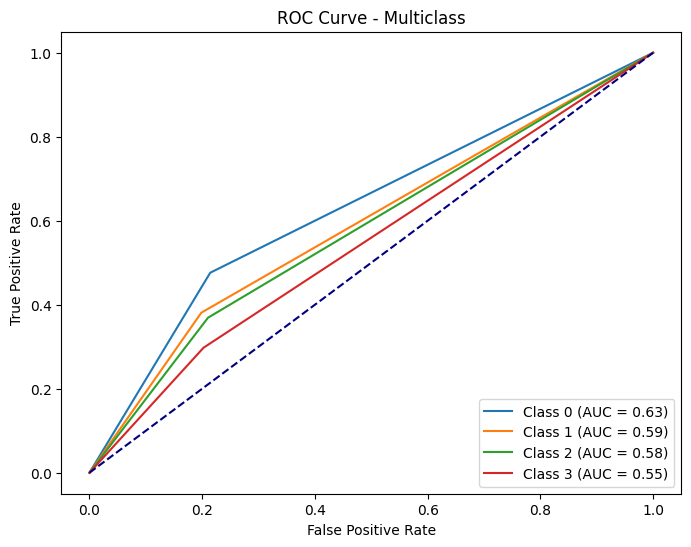

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.4346590062118517
Average Precision Score (Class 1): 0.42265191459432605
Average Precision Score (Class 2): 0.3651428821984408
Average Precision Score (Class 3): 0.31586775885630486
Macro-average Average Precision Score: 0.38458039046523085


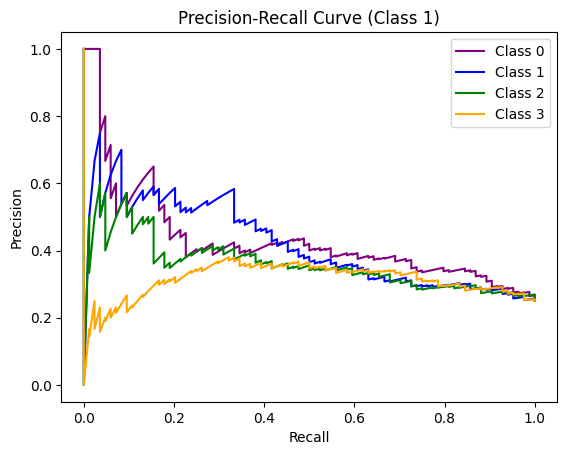

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
lr.fit(X=train_X_4, y=train_y_4)
preds = lr.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[40, 28,  9,  7],
       [30, 22, 12, 20],
       [20,  8, 35, 21],
       [25, 14, 25, 20]])

<Axes: >

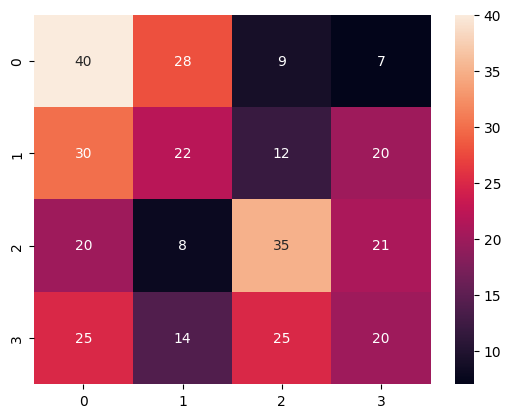

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.3482142857142857

In [ ]:
precision(conf_matrix,0)

0.34782608695652173

In [ ]:
recall(conf_matrix,1)

0.2619047619047619

In [ ]:
specificity(conf_matrix,2)

0.8174603174603174

In [ ]:
f1(conf_matrix,3)

0.2631578947368421

ROC-AUC Score (Class 0): 0.5892857142857143
ROC-AUC Score (Class 1): 0.5317460317460317
ROC-AUC Score (Class 2): 0.6170634920634921
ROC-AUC Score (Class 3): 0.5238095238095238
Macro-average ROC-AUC Score: 0.5654761904761905


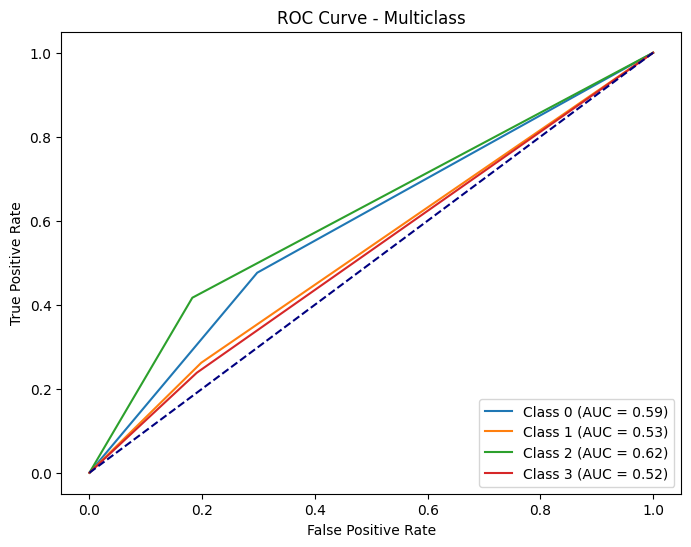

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.35924282852101563
Average Precision Score (Class 1): 0.32273293171033524
Average Precision Score (Class 2): 0.40769993444622915
Average Precision Score (Class 3): 0.32475045200850156
Macro-average Average Precision Score: 0.3536065366715204


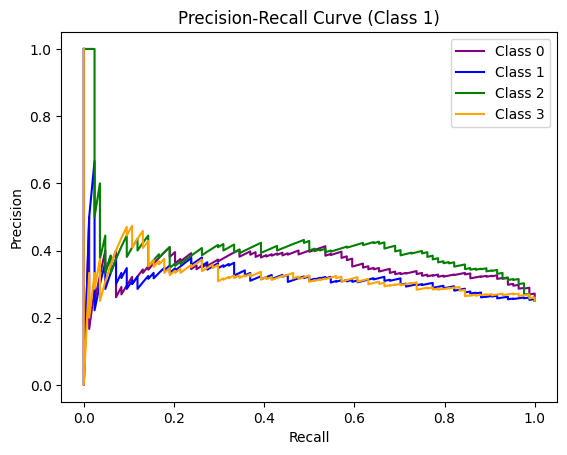

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
lr.fit(X=train_X_5, y=train_y_5)
preds = lr.predict(X=test_X_5)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_5)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_5)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[42, 23, 11,  8],
       [27, 29, 17, 11],
       [22,  7, 23, 32],
       [24, 15, 22, 23]])

<Axes: >

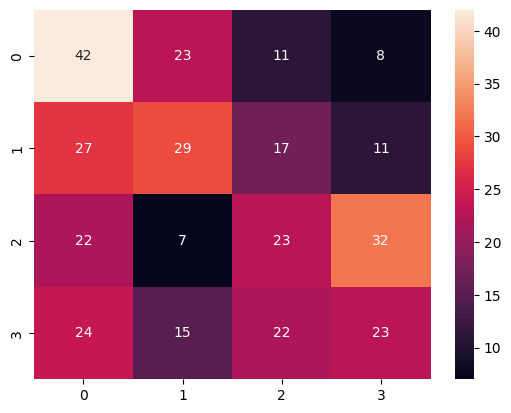

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.3482142857142857

In [ ]:
precision(conf_matrix,0)

0.3652173913043478

In [ ]:
recall(conf_matrix,1)

0.34523809523809523

In [ ]:
specificity(conf_matrix,2)

0.8015873015873016

In [ ]:
f1(conf_matrix,3)

0.29113924050632906

ROC-AUC Score (Class 0): 0.60515873015873
ROC-AUC Score (Class 1): 0.5833333333333334
ROC-AUC Score (Class 2): 0.5376984126984127
ROC-AUC Score (Class 3): 0.5357142857142857
Macro-average ROC-AUC Score: 0.5654761904761904


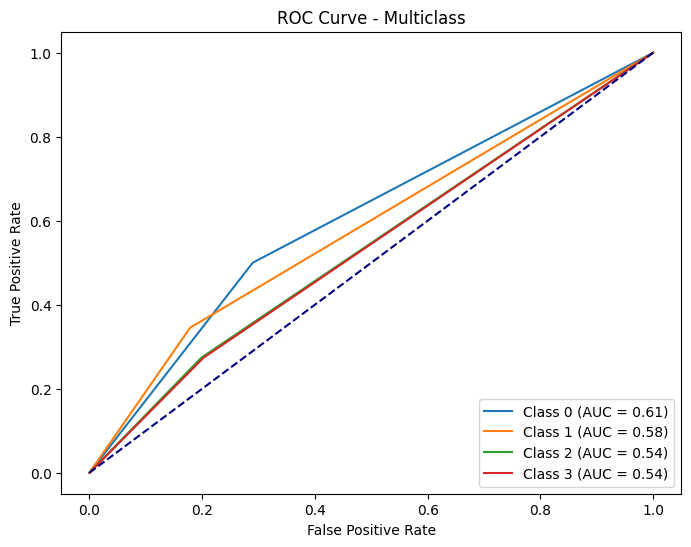

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.4049608891243428
Average Precision Score (Class 1): 0.39577749703291804
Average Precision Score (Class 2): 0.3663195037429984
Average Precision Score (Class 3): 0.28532898206765817
Macro-average Average Precision Score: 0.3630967179919793


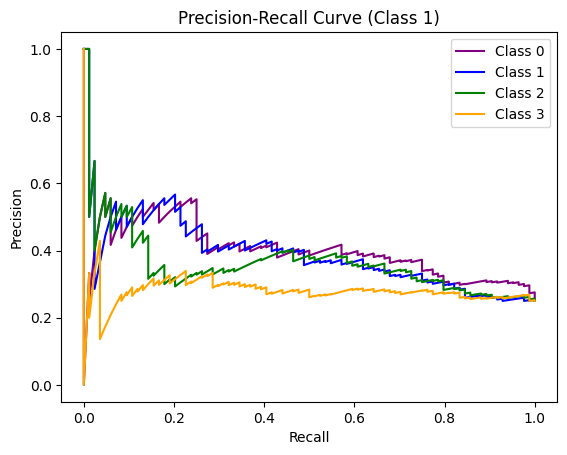

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

#### Compare predictions including song information

- A correct prediction for Ananya is 0, for Arushi is 1, for Ritika is 2, for Shriya is 3
- Songs are ordered in prediction probability, in other words, how confident the model was that the prediction was 1

In [ ]:
Ritika_predictions = compare_predictions_Ritika(preds, preds_, actual_values, ritika_test_3, df_ritika_no_repeats_no_same_up_sampled)
Ritika_predictions = Ritika_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]

In [ ]:
#model correct
Ritika_predictions[Ritika_predictions["prediction"]==2].head()

,prediction,prediction_probability,name,artist,album
9,2,0.293044,Trivia 起 : Just Dance,BTS,Love Yourself 結 'Answer'
13,2,0.256507,Awake,BTS,Wings
15,2,0.028297,Panorama,IZ*ONE,One-reeler / Act IV
16,2,0.220082,MOON,(G)I-DLE,I burn
17,2,0.077151,Mmmh,KAI,KAI - The 1st Mini Album


In [ ]:
# # model incorrect
# Ritika_predictions.head()

,prediction,prediction_probability,name,artist,album
0,1,0.485587,Love Maze,BTS,Love Yourself 轉 'Tear'
1,1,0.457384,Personal,Emotional Oranges,The Juice: Vol. I
2,0,0.376259,Glide,Channel Tres,Glide
3,1,0.370779,Daydream,The Aces,Under My Influence
4,1,0.370779,Devil by the Window,TOMORROW X TOGETHER,The Name Chapter: TEMPTATION


In [ ]:
# # model correct
# Ritika_predictions.tail()

,prediction,prediction_probability,name,artist,album
79,2,0.077151,Mmmh,KAI,KAI - The 1st Mini Album
80,3,0.073374,LOVE DIVE,IVE,LOVE DIVE
81,3,0.072746,Jet Black,Channel Tres,Jet Black
82,3,0.072746,What Do You Want from Me Tonight?,Sidney Gish,Ed Buys Houses
83,2,0.028297,Panorama,IZ*ONE,One-reeler / Act IV


## Random forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
# define search space
space = dict()

space['criterion'] = ['gini', 'entropy']
space['n_estimators'] = [1,10,100,300]
space['max_depth'] = [1,5,15,20,25,30]
space['max_features'] = ['sqrt', 'log2']
search = GridSearchCV(rf, space, scoring='accuracy')

# execute search
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6143207282913166
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 300}


In [ ]:
rf = RandomForestClassifier(random_state=42,
                            criterion='entropy',
                            max_depth=15,
                            max_features='log2',
                            n_estimators=300)

In [ ]:
rf.fit(X=train_X_1, y=train_y_1)
preds = rf.predict(X=test_X_1)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_1)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_1)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[53,  7,  8, 16],
       [ 6, 51, 13, 14],
       [ 2, 12, 46, 24],
       [12, 17, 15, 40]])

<Axes: >

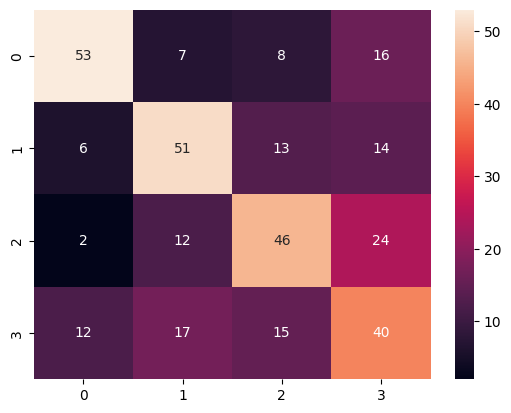

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
precision(conf_matrix,0)

0.726027397260274

In [ ]:
recall(conf_matrix,1)

0.6071428571428571

In [ ]:
specificity(conf_matrix,2)

0.8571428571428571

In [ ]:
f1(conf_matrix,3)

0.449438202247191

ROC-AUC Score (Class 0): 0.7757936507936509
ROC-AUC Score (Class 1): 0.7321428571428572
ROC-AUC Score (Class 2): 0.7023809523809524
ROC-AUC Score (Class 3): 0.6309523809523809
Macro-average ROC-AUC Score: 0.7103174603174603


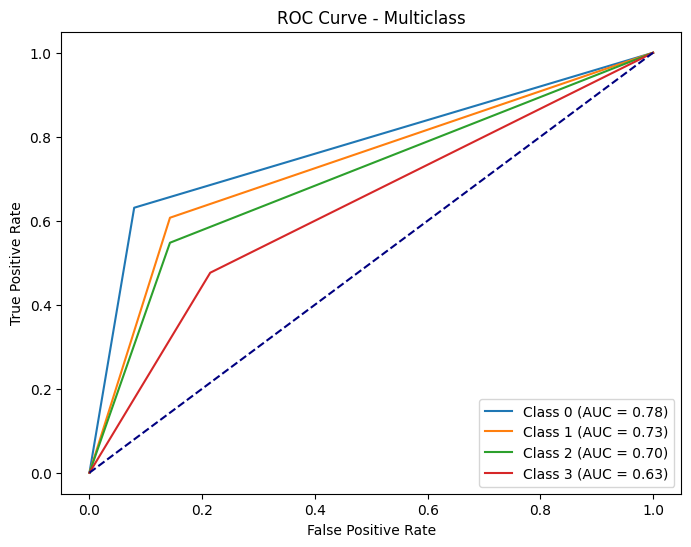

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.7635994739054266
Average Precision Score (Class 1): 0.6988288773598788
Average Precision Score (Class 2): 0.658528113697593
Average Precision Score (Class 3): 0.46568343385942373
Macro-average Average Precision Score: 0.6466599747055806


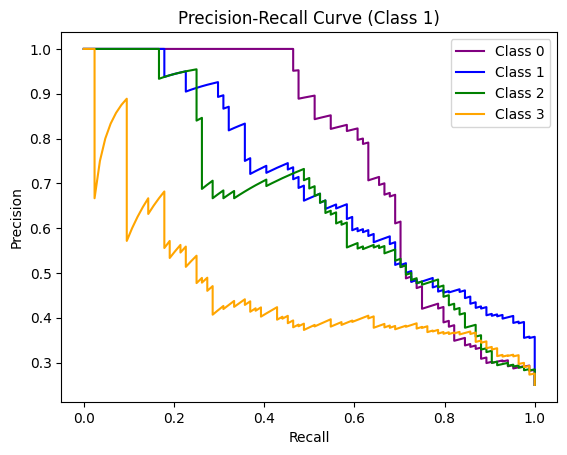

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
rf.fit(X=train_X_2, y=train_y_2)
preds = rf.predict(X=test_X_2)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_2)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_2)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[65,  6,  4,  9],
       [ 8, 54, 11, 11],
       [ 8, 13, 41, 22],
       [ 8, 17, 23, 36]])

<Axes: >

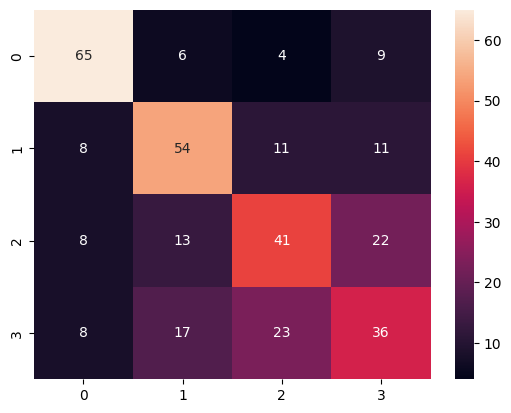

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.5833333333333334

In [ ]:
precision(conf_matrix,0)

0.7303370786516854

In [ ]:
recall(conf_matrix,1)

0.6428571428571429

In [ ]:
specificity(conf_matrix,2)

0.8492063492063492

In [ ]:
f1(conf_matrix,3)

0.4444444444444445

ROC-AUC Score (Class 0): 0.8392857142857142
ROC-AUC Score (Class 1): 0.75
ROC-AUC Score (Class 2): 0.6686507936507937
ROC-AUC Score (Class 3): 0.6309523809523809
Macro-average ROC-AUC Score: 0.7222222222222222


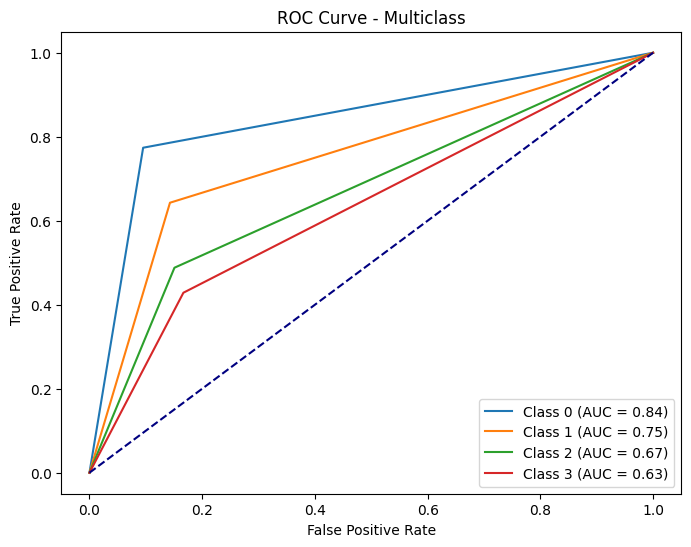

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.868467281107892
Average Precision Score (Class 1): 0.695178609809206
Average Precision Score (Class 2): 0.6218683504736128
Average Precision Score (Class 3): 0.5355730346516561
Macro-average Average Precision Score: 0.6802718190105917


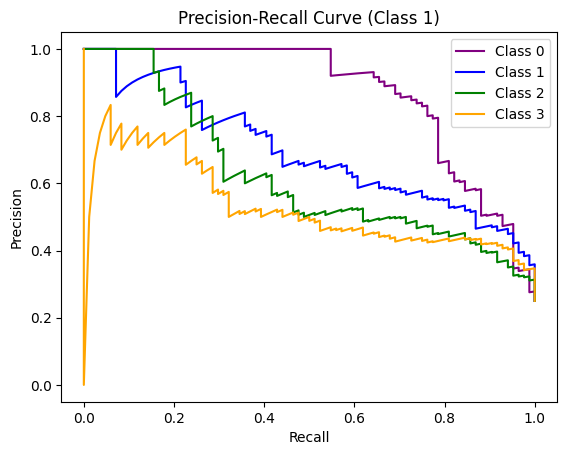

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
rf.fit(X=train_X_3, y=train_y_3)
preds = rf.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_3)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_3)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[68,  1,  6,  9],
       [ 4, 57, 12, 11],
       [ 9,  5, 49, 21],
       [ 9, 16, 18, 41]])

<Axes: >

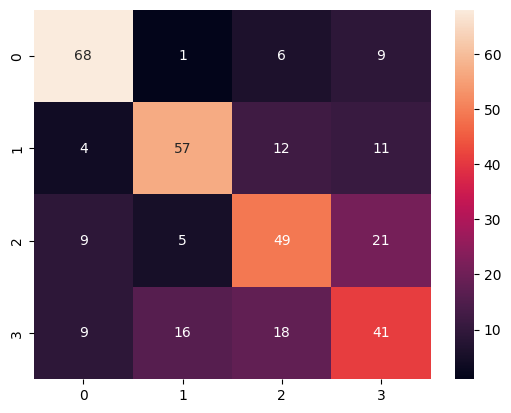

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.6398809523809523

In [ ]:
precision(conf_matrix,0)

0.7555555555555555

In [ ]:
recall(conf_matrix,1)

0.6785714285714286

In [ ]:
specificity(conf_matrix,2)

0.8571428571428571

In [ ]:
f1(conf_matrix,3)

0.4939759036144578

ROC-AUC Score (Class 0): 0.861111111111111
ROC-AUC Score (Class 1): 0.7956349206349207
ROC-AUC Score (Class 2): 0.7202380952380953
ROC-AUC Score (Class 3): 0.6626984126984128
Macro-average ROC-AUC Score: 0.7599206349206349


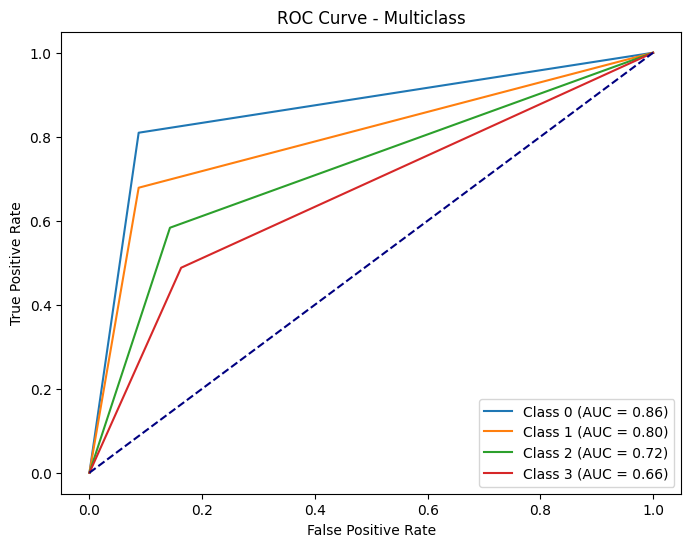

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.8886170553028122
Average Precision Score (Class 1): 0.7698028802012031
Average Precision Score (Class 2): 0.6551054169471952
Average Precision Score (Class 3): 0.4896648308724284
Macro-average Average Precision Score: 0.7007975458309098


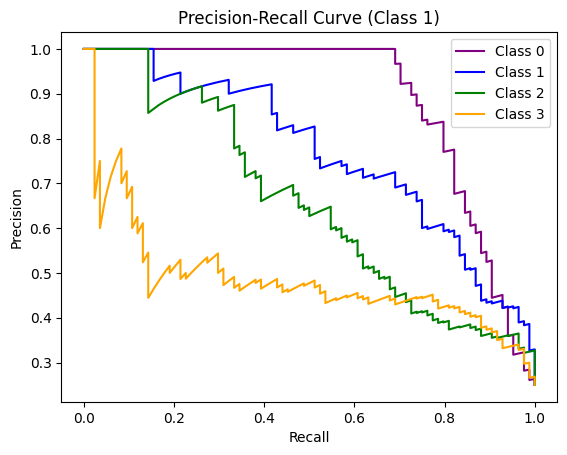

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
rf.fit(X=train_X_4, y=train_y_4)
preds = rf.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_4)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[72,  4,  4,  4],
       [ 4, 63, 11,  6],
       [ 9,  9, 50, 16],
       [ 9, 22, 17, 36]])

<Axes: >

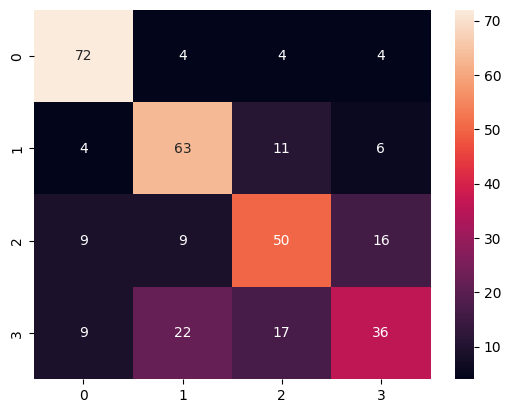

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.6577380952380952

In [ ]:
precision(conf_matrix,3)

0.5806451612903226

In [ ]:
recall(conf_matrix,0)

0.8571428571428571

In [ ]:
specificity(conf_matrix,1)

0.8611111111111112

In [ ]:
f1(conf_matrix,2)

0.6024096385542169

ROC-AUC Score (Class 0): 0.884920634920635
ROC-AUC Score (Class 1): 0.8055555555555557
ROC-AUC Score (Class 2): 0.7341269841269842
ROC-AUC Score (Class 3): 0.6626984126984127
Macro-average ROC-AUC Score: 0.7718253968253969


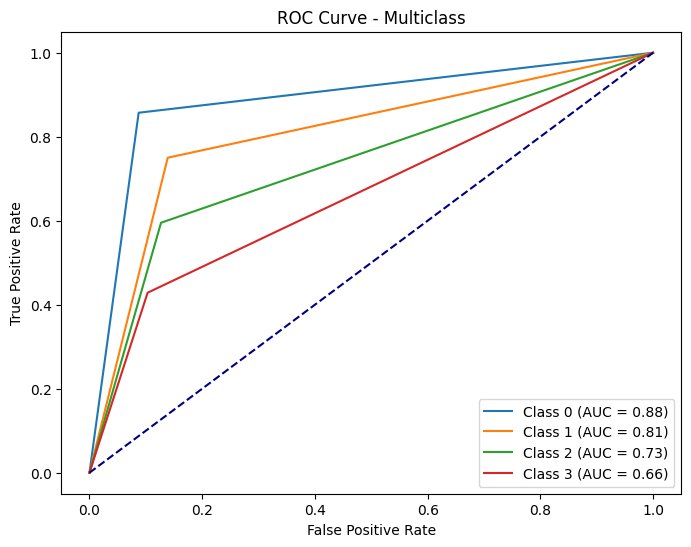

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.9149773888935194
Average Precision Score (Class 1): 0.8017754202868962
Average Precision Score (Class 2): 0.7113897814505827
Average Precision Score (Class 3): 0.606626479791115
Macro-average Average Precision Score: 0.7586922676055283


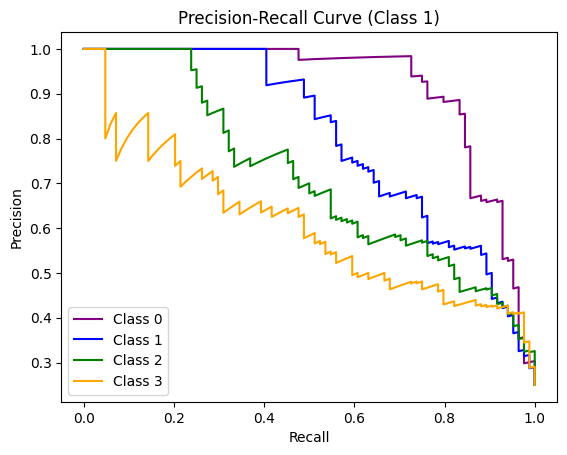

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

In [ ]:
rf.fit(X=train_X_5, y=train_y_5)
preds = rf.predict(X=test_X_5)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_5)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_5)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[63,  7,  7,  7],
       [ 7, 52,  6, 19],
       [ 7,  7, 47, 23],
       [10, 14, 11, 49]])

<Axes: >

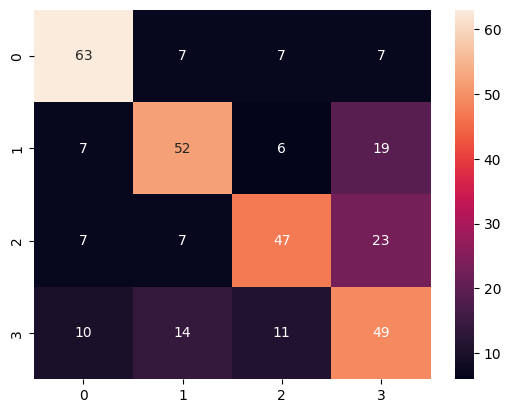

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
accuracy(conf_matrix)

0.6279761904761905

In [ ]:
precision(conf_matrix,0)

0.7241379310344828

In [ ]:
recall(conf_matrix,1)

0.6190476190476191

In [ ]:
specificity(conf_matrix,2)

0.9047619047619048

In [ ]:
f1(conf_matrix,3)

0.5384615384615384

ROC-AUC Score (Class 0): 0.8273809523809523
ROC-AUC Score (Class 1): 0.753968253968254
ROC-AUC Score (Class 2): 0.7321428571428572
ROC-AUC Score (Class 3): 0.6944444444444444
Macro-average ROC-AUC Score: 0.751984126984127


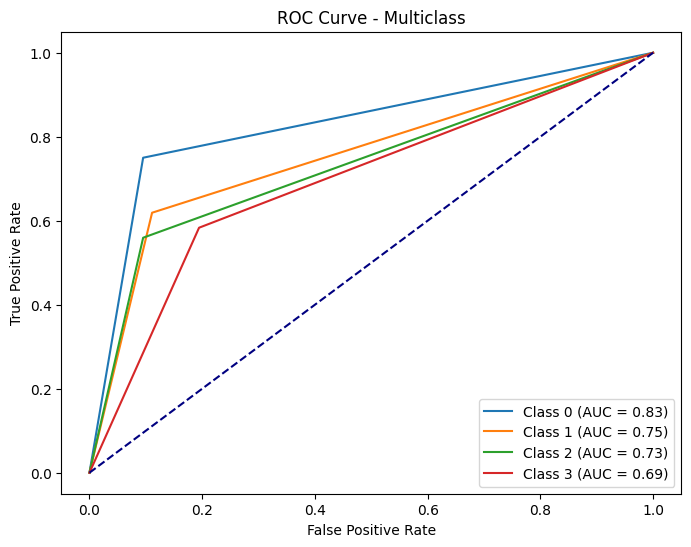

In [ ]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.876399519396402
Average Precision Score (Class 1): 0.752486247426771
Average Precision Score (Class 2): 0.6801946661079329
Average Precision Score (Class 3): 0.49056462977832427
Macro-average Average Precision Score: 0.6999112656773575


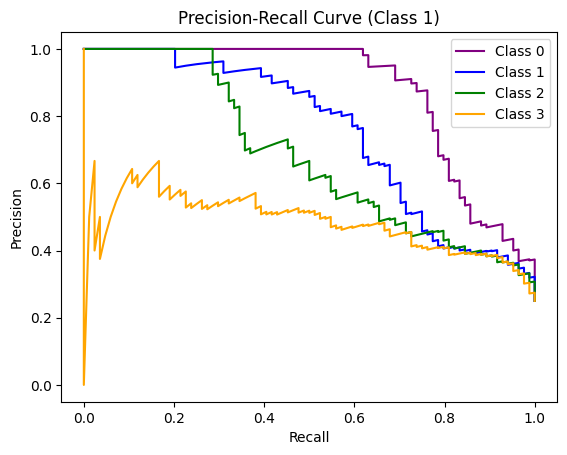

In [ ]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

#### Compare predictions including song information

- A correct prediction for Ananya is 0, for Arushi is 1,for Ritika is 2, for Shriya is 3
- Songs are ordered in prediction probability, in other words, how confident the model was that the prediction was 1

In [ ]:
Ritika_predictions = compare_predictions_Ritika(preds, preds_, actual_values, ritika_test_4, df_ritika_no_repeats_no_same_up_sampled)
Ritika_predictions = Ritika_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]

In [ ]:
#model correct
Ritika_predictions[Ritika_predictions["prediction"]==2].head()

,prediction,prediction_probability,name,artist,album
0,2,0.099816,I'll Be Your Man,The Black Keys,The Big Come Up
4,2,0.211635,Zombie Party,Too Many Zooz,Zombie.P
5,2,0.092719,Dead Fox,Courtney Barnett,"Sometimes I Sit and Think, and Sometimes I Jus..."
6,2,0.250162,Trust,Jonas Brothers,Happiness Begins
8,2,0.019454,Lucy,Caleb Henry,California Mistake


In [ ]:
# # model incorrect
# Ritika_predictions.head()

,prediction,prediction_probability,name,artist,album
0,1,0.657479,DUMB DUMB,JEON SOMI,DUMB DUMB
1,1,0.359937,Automatic Stop,The Strokes,Room On Fire
2,1,0.351175,Neighbour Riffs,Surfer Blood,Astro Coast
3,1,0.340938,Fireworks (I'm The One),ATEEZ,ZERO : FEVER Part.2
4,2,0.306196,She Don't (feat. Ty Dolla $Ign),Ella Mai,Time


In [ ]:
# # model correct
# Ritika_predictions.tail()

,prediction,prediction_probability,name,artist,album
79,2,0.048792,FEARLESS,LE SSERAFIM,FEARLESS
80,2,0.036752,Night Running,Cage The Elephant,Goodbye / Ready To Let Go / Night Running / Ho...
81,2,0.020937,Designer,NCT 127,2 Baddies - The 4th Album
82,2,0.019454,Lucy,Caleb Henry,California Mistake
83,2,0.013333,Dive,NCT DOJAEJUNG,Perfume - The 1st Mini Album
